In [17]:
import pandas as pd
import torch
import numpy as np
import torch_model
from sklearn.neighbors import NearestNeighbors
import torchvision.transforms as T
import os
from PIL import Image
import matplotlib.pyplot as plt
import urllib

from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import pickle

with open("tfidf_vector.pkl", "rb") as f:
    tfidf_vector = pickle.load(f)


In [72]:
product = pd.read_csv('../dataset/preprocessing_product.csv')
product = product.drop('Unnamed: 0',axis=1)

tfidf_matrix = tfidf_vector.fit_transform(product['food_ingredient']).toarray()
tfidf_matrix_feature = tfidf_vector.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix, columns=tfidf_matrix_feature, index = product.product_name)
print(tfidf_matrix.shape)
tfidf_matrix.head()

cosine_sim = cosine_similarity(tfidf_matrix)

cosine_sim_df = pd.DataFrame(cosine_sim, index = product.product_name, columns = product.product_name)
print(cosine_sim_df.shape)
cosine_sim_df.head()

def ingredient_recommendations(target_name, matrix, items, k=10):
    recom_idx = matrix.loc[:, target_name].values.reshape(1, -1).argsort()[:, ::-1].flatten()[1:k+1]
    recom_name = items.iloc[recom_idx, :].product_name.values
    recom_ingredient = items.iloc[recom_idx, :].food_ingredient.values
    target_name_list = np.full(len(range(k)), target_name)
    target_ingredient_list = np.full(len(range(k)), items[items.product_name == target_name].food_ingredient.values)
    d = {
        'target_name':target_name_list,
        'target_ingredient':target_ingredient_list,
        'recom_name' : recom_name,
        'recom_ingredient' : recom_ingredient
    }
    return pd.DataFrame(d)

def ingredient_recommendations_product_name(target_name, matrix, items, k=10):
    recom_idx = matrix.loc[:, target_name].values.reshape(1, -1).argsort()[:, ::-1].flatten()[1:k+1]
    recom_name = items.iloc[recom_idx, :].product_name.values
    return recom_name

ingredient_recommendations('[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩', cosine_sim_df, product)
# ingredient_recommendations_product_name('[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩', cosine_sim_df, product)

(309, 351)
(309, 309)


,target_name,target_ingredient,recom_name,recom_ingredient
0,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",[fresheasy] 패밀리 양식다이닝 4종 세트,"['기타 수산물가공품', '복합조미식품', '기타가공품', '빵류', '청피망', ..."
1,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",[fresheasy] 홀리데이 채끝 스테이크 5종세트,"['복합조미식품', '곡류가공품', '볶은마늘분말', '빵류', '서류가공품', '..."
2,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",[fresheasy] 홀리데이 채끝 스테이크 5종 세트,"['복합조미식품', '곡류가공품', '볶은마늘분말', '빵류', '서류가공품', '..."
3,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",[모두의맛집 - 서울지짐이] 오징어비빔쫄면,"['기타 수산물가공품', '숙면', '콩나물', '소스', '당근']"
4,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",[모두의맛집 - 수제비먹는닭갈비] 바지락 수제비,"['기타 수산물가공품', '생면', '소스', '쥬키니호박', '대파']"
5,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",당일 제조하여 더욱 신선한 쿡솜씨 이탈리안감바스,"['기타 수산물가공품', '새송이버섯', '빵류', '파슬리잎', '토마토열매', ..."
6,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",[프레시지] 온가족 홈파티 밀키트 4종 세트(블랙라벨 2팩+감바스+쉬림프로제),"['기타 수산물가공품', '복합조미식품', '유함유가공품', '새송이버섯', '정제..."
7,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",삼립 시티델리 브리또 불고기라이스 600g (150g 4입) 2봉,"['곡류가공품', '복합조미식품', '기타가공품', '빵류', '설탕', '모조치즈..."
8,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",삼립 시티델리 이탈리아식 구운 만두 칼조네 콤비네이션 440g 2봉,"['복합조미식품', '정제소금', '설탕', '식품첨가물', '자연치즈', '소스'..."
9,[fresheasy] 누구나홀딱반한닭 쉬림프치킨파히타 2인분 3팩,"['기타 수산물가공품', '복합조미식품', '빵류', '청피망', '자연치즈', '...",당일 제조하여 더욱 신선한 쿡솜씨 골뱅이무침,"['양배추', '수산물가공품', '청양고추', '냉면', '소스', '당근', '양..."


In [11]:
def load_image_tensor(image_url, device):
  # 이미지 다운로드
  with urllib.request.urlopen(image_url) as response:
    with open('temp_image.jpg', 'wb') as out_file:
      out_file.write(response.read())

  # 이미지 열기 및 변환
  image = Image.open('temp_image.jpg').convert("RGB")
  image = image.resize((IMG_HEIGHT, IMG_WIDTH))
  image_tensor = transforms.ToTensor()(image)

  # 이미지 텐서를 배치 차원에 맞게 변환
  image_tensor = image_tensor.unsqueeze(0)

  # 임시 이미지 파일 삭제
  os.remove('temp_image.jpg')

  # 이미지 텐서를 GPU 또는 CPU 장치로 전송
  image_tensor = image_tensor.to(device)

  return image_tensor

In [12]:
def compute_similar_images(image_path, num_images, embedding, device):
    image_tensor = load_image_tensor(image_path, device)
    # image_tensor = image_tensor.to(device)

    with torch.no_grad():
        image_embedding = encoder(image_tensor).cpu().detach().numpy()

    print(image_embedding.shape)

    flattened_embedding = image_embedding.reshape((image_embedding.shape[0], -1))
    print(flattened_embedding.shape)

    knn = NearestNeighbors(n_neighbors=num_images, metric="cosine")
    knn.fit(embedding)

    _, indices = knn.kneighbors(flattened_embedding)
    indices_list = indices.tolist()
    print(indices_list)
    return indices_list

In [51]:
def plot_similar_images(indices_list):
    if not indices_list:
        print("No similar images found.")
        return

    for sublist in indices_list:
        if not sublist:
            print(f"Skipping empty sublist for image {sublist[0]}.")
            continue

        for index in sublist:
            try:
                img_url = image_urls[index]
                img_name = str(index) + ".jpg"

                # 이미지 다운로드
                with urllib.request.urlopen(img_url) as response:
                    with open(img_name, 'wb') as out_file:
                        out_file.write(response.read())

                # 다운로드한 이미지 열기
                img_path = os.path.join("./", img_name)
                img = Image.open(img_path).convert("RGB")
                plt.imshow(img)
                plt.show()

                # 임시 이미지 파일 삭제
                os.remove(img_name)

            except IndexError:
                print(f"Invalid index: {index}. Skipping...")
    # 추가적인 정리 (이미지 파일 닫기 등)

In [52]:
def get_product_names(indices_list, products):
    similar_product_names = []

    for sublist in indices_list:
        if not sublist:
            print(f"Skipping empty sublist.")
            continue

        for index in sublist:
            try:
                product_name = products.iloc[index]['product_name']
                similar_product_names.append(product_name)

            except IndexError:
                print(f"Invalid index: {index}. Skipping...")

    return similar_product_names


In [20]:
TEST_IMAGE_PATH = "https://image.hmall.com/static/9/9/26/27/2127269978_0.jpg?RS=520x520&AR=0&ao=2"
NUM_IMAGES = 5
ENCODER_MODEL_PATH = "./baseline_encoder.pt"
DECODER_MODEL_PATH = "./baseline_decoder.pt"
EMBEDDING_PATH = "./data_embedding_f.npy"
EMBEDDING_SHAPE = (1, 256, 16, 16)

IMG_HEIGHT = 512 
IMG_WIDTH = 512 

In [18]:
class ConvEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # self.img_size = img_size
        self.conv1 = nn.Conv2d(3, 16, (3, 3), padding=(1, 1))
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d((2, 2))

        self.conv2 = nn.Conv2d(16, 32, (3, 3), padding=(1, 1))
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d((2, 2))

        self.conv3 = nn.Conv2d(32, 64, (3, 3), padding=(1, 1))
        self.relu3 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d((2, 2))

    def forward(self, x):
        # Downscale the image with conv maxpool etc.
        # print(x.shape)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # print(x.shape)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # print(x.shape)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)

        # print(x.shape)
        return x

In [22]:
import pandas as pd

products = pd.read_csv('../dataset/hmall_food_last.csv')
products = products[['product_name','image_main']]
image_urls = []

for url in products['image_main']:
    image_urls.append(url)

(1, 64, 64, 64)
(1, 262144)
[[274, 277, 268, 264, 280]]


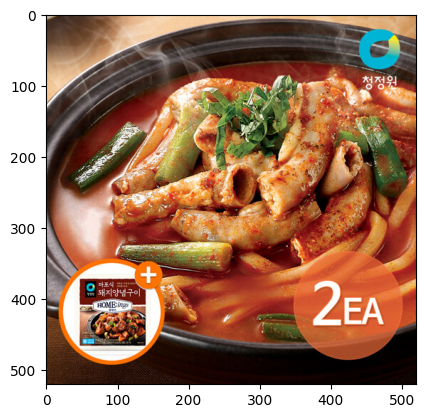

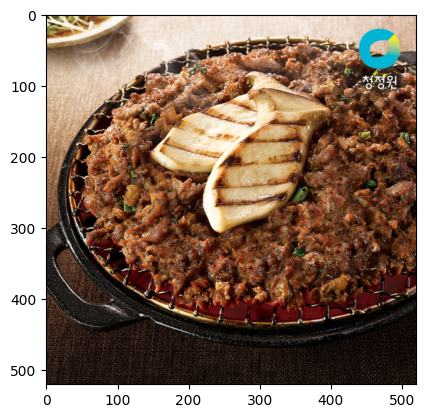

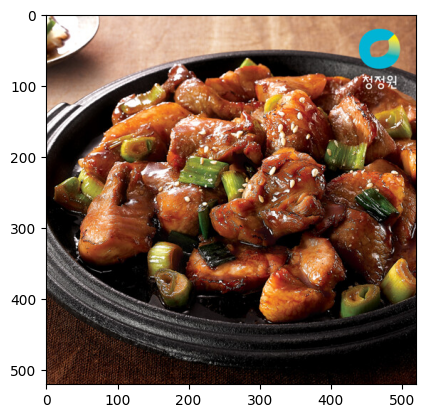

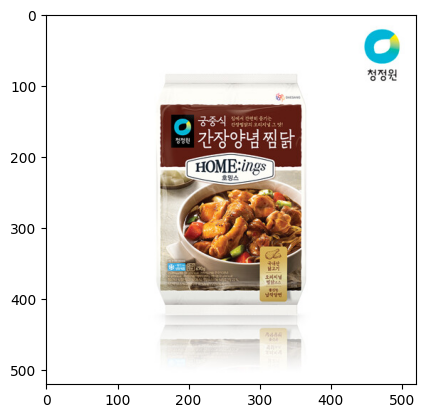

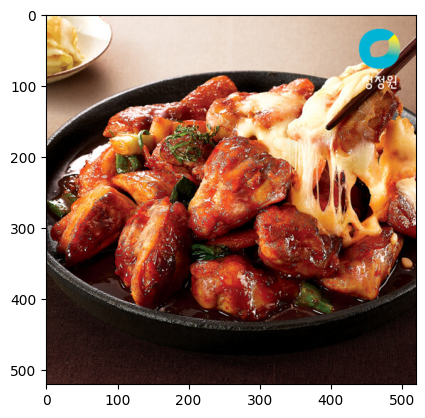

['청정원 호밍스 밀키트 부산식 곱창전골 760g x 2개 + (증정)돼지양념구이210g',
 '청정원 호밍스 밀키트 언양식 바싹불고기 270g',
 '청정원 호밍스 밀키트 마포식 돼지양념구이 210g',
 '청정원 호밍스 밀키트 궁중식 간장양념 찜닭 670g',
 '청정원 호밍스 밀키트 춘천식 치즈닭갈비 220g']

In [53]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
encoder = ConvEncoder()

# Load the state dict of encoder
encoder.load_state_dict(torch.load(ENCODER_MODEL_PATH, map_location=device))
encoder.eval()
encoder.to(device)

# Loads the embedding
embedding = np.load(EMBEDDING_PATH)

indices_list = compute_similar_images(TEST_IMAGE_PATH, NUM_IMAGES, embedding, device)
plot_similar_images(indices_list)
get_product_names(indices_list, products)

In [76]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import torch
import torchvision.transforms as transforms
from PIL import Image
import urllib.request
import os
from sklearn.neighbors import NearestNeighbors

def hybrid_recommender(target_name, target_image_path, products, content_matrix, embedding, device, k):
    """하이브리드 추천 시스템 함수"""

    # 콘텐츠 기반 추천 결과
    content_recommendations = ingredient_recommendations_product_name(target_name, content_matrix, products)

    # 이미지 기반 추천 결과
    image_indices = compute_similar_images(target_image_path, k, embedding, device)
    image_recommendations = get_product_names(image_indices, products)

    # 콘텐츠 기반 추천과 이미지 기반 추천의 결과를 결합
    combined_recommendations = pd.DataFrame({'recom_name': content_recommendations, 'recommendation_score': 1})

    # 이미지 기반 추천 결과를 반영하여 추천 점수 업데이트
    for recom_name in image_recommendations:
        if recom_name in combined_recommendations['recom_name'].values:
            combined_recommendations.loc[combined_recommendations['recom_name'] == recom_name, 'recommendation_score'] += 1
        else:
            combined_recommendations = pd.concat([combined_recommendations, pd.DataFrame({'recom_name': [recom_name], 'recommendation_score': [1]})], ignore_index=True)

    # 추천 점수에 따라 정렬
    combined_recommendations = combined_recommendations.sort_values(by='recommendation_score', ascending=False)

    return combined_recommendations

TARGET_PRODUCT = '청정원 호밍스 밀키트 부산식 곱창전골 760g x 2개'
TARGET_IMAGE_PATH = "https://image.hmall.com/static/9/9/26/27/2127269978_0.jpg?RS=520x520&AR=0&ao=2"
NUM_RECOMMENDATIONS = 10
WEIGHT_CONTENT = 0.5
WEIGHT_IMAGE = 0.5


# 예시 사용
hybrid_recommendations = hybrid_recommender(TARGET_PRODUCT, TARGET_IMAGE_PATH, product, cosine_sim_df, embedding, device, 10)
print(hybrid_recommendations)


(1, 64, 64, 64)
(1, 262144)
[[274, 277, 268, 264, 280, 271, 266, 282, 265, 272]]
                                         recom_name  recommendation_score
0                         청정원 호밍스 밀키트 부산식 곱창전골 760g                     2
1   청정원 호밍스 밀키트 부산식 곱창전골 760g x 2개 + (증정)돼지양념구이210g                     2
2                            청정원 호밍스 밀키트 낙곱새전골 800g                     2
8                        청정원 호밍스 밀키트 춘천식 치즈닭갈비 220g                     2
3                       청정원 호밍스 밀키트 낙곱새전골 800g x 2개                     1
4                           청정원 호밍스 밀키트 춘천 닭갈비 800g                     1
5                     [족발야시장] 족발야시장 직화 양념곱창 250g 3팩                     1
6                    [족발야시장] 족발야시장 직화 양념곱창 250g 10팩                     1
7                     [족발야시장] 족발야시장 직화 양념곱창 250g 6팩                     1
9                     청정원 호밍스 밀키트 햄/고기 듬뿍 부대찌개 600g                     1
10                       청정원 호밍스 밀키트 언양식 바싹불고기 270g                     1
11                      청정원 호밍스